<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Data Exploration: Categorical Data Field deepdive<span class="tocSkip"></span></h1>

**This notebook provides a wide range of examples of analyses done on individual numerical variables**.


<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Data-Exploration:-Categorical-Data-Field-deepdive" data-toc-modified-id="Data-Exploration:-Categorical-Data-Field-deepdive-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration: Categorical Data Field deepdive</a></span></li><li><span><a href="#Univariate-distribution-information" data-toc-modified-id="Univariate-distribution-information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Univariate distribution information</a></span><ul class="toc-item"><li><span><a href="#Moments,-Statistics,-Quantiles,-and-Extremes" data-toc-modified-id="Moments,-Statistics,-Quantiles,-and-Extremes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Moments, Statistics, Quantiles, and Extremes</a></span></li><li><span><a href="#Frequency-table-and-plots" data-toc-modified-id="Frequency-table-and-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Frequency table and plots</a></span></li></ul></li><li><span><a href="#Check-for-problematic-values-in-a-column" data-toc-modified-id="Check-for-problematic-values-in-a-column-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check for problematic values in a column</a></span><ul class="toc-item"><li><span><a href="#Detect-capitalization-and-space-issues" data-toc-modified-id="Detect-capitalization-and-space-issues-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Detect capitalization and space issues</a></span></li><li><span><a href="#Explore-n-grams" data-toc-modified-id="Explore-n-grams-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Explore n-grams</a></span></li><li><span><a href="#Other-string-exploration" data-toc-modified-id="Other-string-exploration-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Other string exploration</a></span></li></ul></li><li><span><a href="#Two-way-and-Multiway-tables" data-toc-modified-id="Two-way-and-Multiway-tables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Two-way and Multiway tables</a></span><ul class="toc-item"><li><span><a href="#Two-way-table-with-frequencies" data-toc-modified-id="Two-way-table-with-frequencies-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Two-way table with frequencies</a></span></li><li><span><a href="#Multi-way-table-and-pivot" data-toc-modified-id="Multi-way-table-and-pivot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Multi-way table and pivot</a></span></li></ul></li></ul>

**We begin by importing key libraries for data handling and exploration**

In [72]:
# Import key libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display

**The following cell imports OW-style formatting for charts, e.g. code and axes styles**

The code is entirely optional, and makes use of two files within the resources folder:
* ow_style.mplstyle, which contains general color and formatting schemes
* ow_colormap.py, which contains code for colormaps that map numbers to a color scale (e.g. for heatmaps)

The mplstyle file is imported using matplotlib's method 'plt.style.use'. The ow_colormap is a regular .py script file that needs to be imported using 'import', and to do so, the path needs to be made available through sys.path. Here we are setting the path to the 'utilities' folder.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
# Load in OW color scheme and plot style
plt.style.use('../../utilities/resources/ow_style.mplstyle')

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')
from resources.ow_colormap import ow_colormap, color_dict

from data_exploration import univariate, strings_categoricals

**Load csv containing data into pandas**

For an overview of this dataset, see the "dataset_overview.ipynb" notebook.

In [69]:
# Read in the data using pandas, with low_memory=False in case the dataset is large
input_data = pd.read_csv("sample_input/exploration_hmda_lar.csv", low_memory=False)

In [75]:
categorical_summary, categorical_columns= strings_categoricals.get_dataset_string_info(input_data)
categorical_summary

--------------------------
Potential numeric columns:
--------------------------
['action_taken', 'agency_code', 'applicant_ethnicity', 'applicant_income_000s', 'applicant_race_1', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 'applicant_race_name_3', 'applicant_race_name_4', 'applicant_race_name_5', 'applicant_sex', 'application_date_indicator', 'as_of_year', 'census_tract_number', 'co_applicant_ethnicity', 'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'co_applicant_race_name_2', 'co_applicant_race_name_3', 'co_applicant_race_name_4', 'co_applicant_race_name_5', 'co_applicant_sex', 'county_code', 'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'edit_status', 'hoepa_status', 'lien_status', 'loan_purpose', 'loan_type', 'msamd', 'owner_occupancy', 'preapproval', 'property_type', 'purchaser_type', 'sequence_number', 'state_code', 'hud_median_family_income', 'loan_amount_000s', '

,column_name,unique_values,datatype,% null
0,action_taken_name,6,object,0.0
1,agency_abbr,6,object,0.0
2,agency_name,6,object,0.0
3,applicant_ethnicity_name,4,object,0.0
4,applicant_race_name_1,7,object,0.0
5,applicant_race_name_2,2,object,99.5
6,applicant_sex_name,4,object,0.0
7,co_applicant_ethnicity_name,5,object,0.0
8,co_applicant_race_name_1,7,object,0.0
9,co_applicant_sex_name,5,object,0.0


In [76]:
categorical_columns

['action_taken_name',
 'agency_abbr',
 'agency_name',
 'applicant_ethnicity_name',
 'applicant_race_name_1',
 'applicant_race_name_2',
 'applicant_sex_name',
 'co_applicant_ethnicity_name',
 'co_applicant_race_name_1',
 'co_applicant_sex_name',
 'county_name',
 'denial_reason_name_1',
 'denial_reason_name_2',
 'denial_reason_name_3',
 'edit_status_name',
 'hoepa_status_name',
 'lien_status_name',
 'loan_purpose_name',
 'loan_type_name',
 'msamd_name',
 'owner_occupancy_name',
 'preapproval_name',
 'property_type_name',
 'purchaser_type_name',
 'respondent_id',
 'state_abbr',
 'state_name']

<a href="#table_of_contents">(Back to top)</a>
<a id='univariate_distribution'></a>
# Univariate distribution information

This section provides statistics and plots to analyze individual numerical variables. 


## Moments, Statistics, Quantiles, and Extremes

**We start with a function that generates a wide range of information**

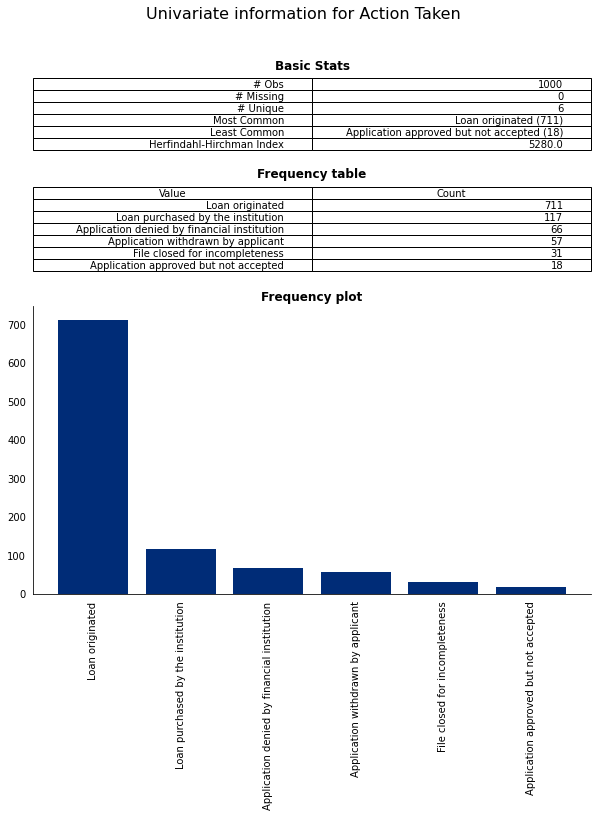

In [74]:
variable = 'action_taken_name'
variable_name = "Action Taken"

output, results = univariate.univariate_summary_categorical(input_data[variable], variable_name)
output

**You can access the tables from these results, as they are stored in a dictionary with the following keys**

* stats
* freq

In [18]:
results['stats']

,0,1
0,# Obs,1000
1,# Missing,0
2,# Unique,6
3,Most Common,Loan originated (711)
4,Least Common,Application approved but not accepted (18)
5,Herfindahl-Hirchman Index,5280.0


**You can export these as png files**

In [27]:
variables = [
     'action_taken_name',
     'agency_name',
     'applicant_ethnicity_name',
     'county_name',
     'denial_reason_name_1',
     'lien_status_name',
     'loan_purpose_name',
     'property_type_name',
     'state_name'
]

univariate.export_univariate_summary_categorical(input_data, variables, output_folder = "sample_output")

Processing action_taken_name
Processing agency_name
Processing applicant_ethnicity_name
Processing county_name
Processing denial_reason_name_1
Processing lien_status_name
Processing loan_purpose_name
Processing property_type_name
Processing state_name


'Completed'

## Frequency table and plots

**Frequency Table**

In [34]:
variable = 'county_name'

frequency_table = input_data[variable].value_counts(dropna=False).rename_axis(variable).reset_index(name='counts')
frequency_table

,county_name,counts
0,Suffolk County,179
1,Monroe County,158
2,Nassau County,117
3,Queens County,76
4,Kings County,64
5,Tompkins County,50
6,Westchester County,46
7,New York County,36
8,Richmond County,32
9,Ulster County,31


**Frequency plot**

If there is a very large number of unique values, we may need to focus on just the most frequent categories in the plot (see second plot)

<AxesSubplot:xlabel='county_name', ylabel='frequency'>

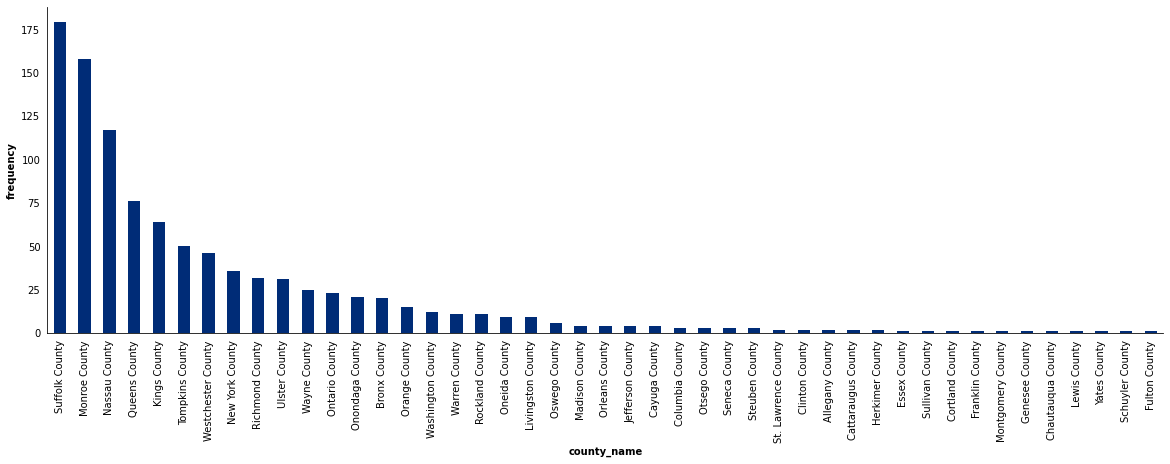

In [42]:
variable = 'county_name'

fig, ax = plt.subplots(figsize=(20,6))
input_data[variable].value_counts(dropna=False).plot(ax=ax, kind='bar', xlabel=variable, ylabel='frequency')

<AxesSubplot:xlabel='county_name', ylabel='frequency'>

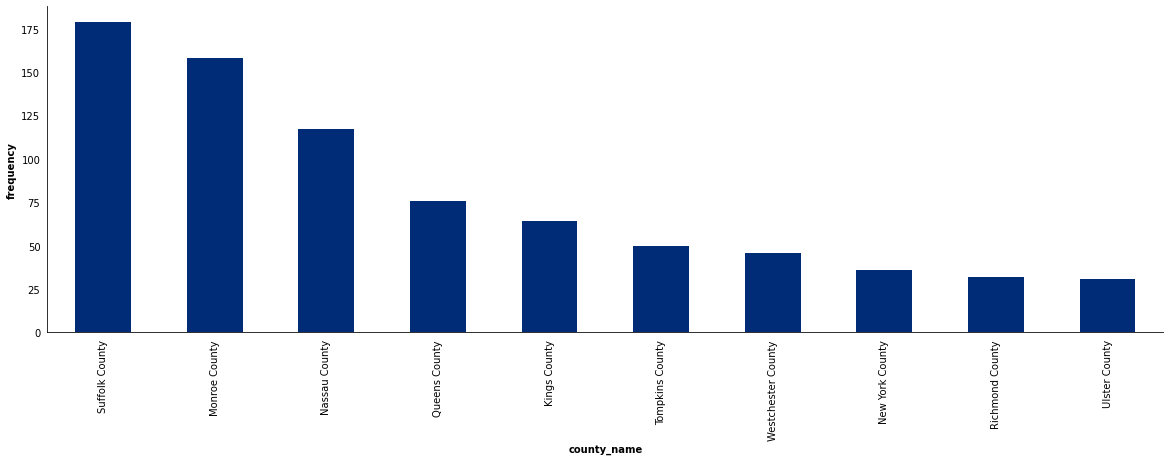

In [43]:
variable = 'county_name'
top_N = 10

fig, ax = plt.subplots(figsize=(20,6))
input_data[variable].value_counts(dropna=False).head(top_N).plot(ax=ax, kind='bar', xlabel=variable, ylabel='frequency')

**seaborn can be used to generate the plot as well**

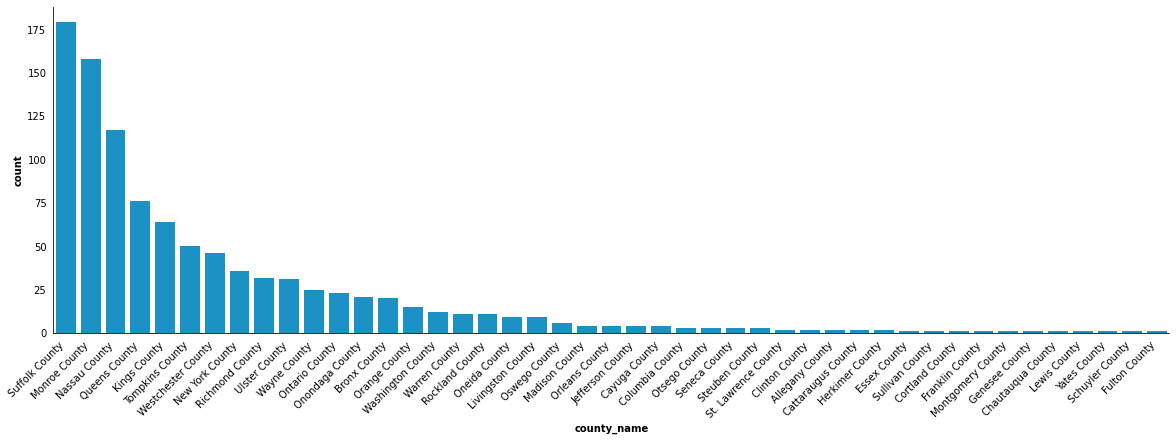

In [64]:
fig, ax = plt.subplots(figsize=(20,6))
g = sns.countplot(x = input_data[variable], color = color_dict['blue'], ax=ax, order = input_data[variable].value_counts(dropna=False).index)
_ = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

If necessary, it is possible to scale the counts (y-axis) in case there are very uneven frequencies:
* Matplotlib: ax.set_yscale('log')
* Seaborn: g.set_yscale("log")

# Check for problematic values in a column

**Let's first introduce some problems to the column 'denial_reason_name_1'**

For cleaning, see the notebook templates for 'Data Transformation' (you may need to download it from Gryphon)

In [83]:
# Randomly capitalize A

def capitalize_A(word):
    if np.random.uniform() < 0.1:
        return word.replace("a","A")
    else:
        return word
    
input_data['denial_reason_name_1'] = input_data['denial_reason_name_1'].apply(lambda x: capitalize_A(str(x)))

# Randomly add double spaces
def add_double_spaces(word):
    if np.random.uniform() < 0.1:
        return word.replace(" ","  ")
    else:
        return word
    
input_data['denial_reason_name_1'] = input_data['denial_reason_name_1'].apply(lambda x: add_double_spaces(str(x)))

# Randomly add leading or trailing spaces
def add_spaces(word):
    rand = np.random.uniform()
    if rand < 0.1:
        return " " + word
    elif rand < 0.3:
        return word + " " 
    else:
        return word 
    
input_data['denial_reason_name_1'] = input_data['denial_reason_name_1'].apply(lambda x: add_spaces(str(x)))


## Detect capitalization and space issues

In [85]:
variables = 'denial_reason_name_1'

strings_categoricals.check_string_col(input_data, variable)

There are strings with the same text but different capitalization. Standardization of case is required for denial_reason_name_1.

31.000% (count 310) of rows in denial_reason_name_1 have leading/trailing spaces which may need to be removed.

10.400% (count 104) of rows in denial_reason_name_1 have double spaces which may need to be removed.



,column,check_type,needs_cleaning,metric
0,denial_reason_name_1,(In)consistent use of cases,1,Refer to outputs of view_inconsistent_cases
0,denial_reason_name_1,Trailing/leading spaces,1,31.000% (count 310) have leading/trailing spaces
0,denial_reason_name_1,Double spaces,1,10.400% (count 104) have double spaces


In [86]:
strings_categoricals.view_inconsistent_cases(input_data, variable)

,denial_reason_name_1,uppercased_denial_reason_name_1
454,Debt-to-income rAtio,DEBT-TO-INCOME RATIO
134,Debt-to-income ratio,DEBT-TO-INCOME RATIO
1,nAn,NAN
13,nan,NAN
758,Credit ApplicAtion incomplete,CREDIT APPLICATION INCOMPLETE
104,Credit application incomplete,CREDIT APPLICATION INCOMPLETE
464,Credit application incomplete,CREDIT APPLICATION INCOMPLETE
961,Credit ApplicAtion incomplete,CREDIT APPLICATION INCOMPLETE
63,Debt-to-income ratio,DEBT-TO-INCOME RATIO
498,Debt-to-income rAtio,DEBT-TO-INCOME RATIO


## Explore n-grams

**N-grams are sequences of words of length N. In text data, N-grams may identify useful phrases that could serve as indicators on their own**

In [91]:
data_series = input_data['denial_reason_name_1']

ngrams, _, _ = strings_categoricals.explore_ngrams(data_series, min_n=2, max_n=3, max_terms = 10)
ngrams

,n-grams,N,Document Frequency,Term Frequency
3,credit history,2,14,14
4,debt to,2,11,11
5,debt to income,3,11,11
6,income ratio,2,11,11
7,to income,2,11,11
8,to income ratio,3,11,11
0,application incomplete,2,8,8
1,credit application,2,8,8
2,credit application incomplete,3,8,8
9,unverifiable information,2,1,1


## Other string exploration

**If you are working with text data, we recommend downloading the Basic NLP Processing templates**

# Two-way and Multiway tables

## Two-way table with frequencies

**Basic two-way table**

In [100]:
var1 = 'loan_purpose_name'
var2 = 'action_taken_name'

pd.crosstab(input_data[var1],input_data[var2], dropna=False)

action_taken_name,Application approved but not accepted,Application denied by financial institution,Application withdrawn by applicant,File closed for incompleteness,Loan originated,Loan purchased by the institution
loan_purpose_name,,,,,,
Home improvement,3,14,3,0,32,3
Home purchase,6,19,18,7,442,73
Refinancing,9,33,36,24,237,41


**Two-way table with totals**

In [101]:
pd.crosstab(input_data[var1],input_data[var2], margins=True, margins_name="Total", dropna=False)

action_taken_name,Application approved but not accepted,Application denied by financial institution,Application withdrawn by applicant,File closed for incompleteness,Loan originated,Loan purchased by the institution,Total
loan_purpose_name,,,,,,,
Home improvement,3,14,3,0,32,3,55
Home purchase,6,19,18,7,442,73,565
Refinancing,9,33,36,24,237,41,380
Total,18,66,57,31,711,117,1000


**Two-way table as percentages, and also color-coded as heatmap**

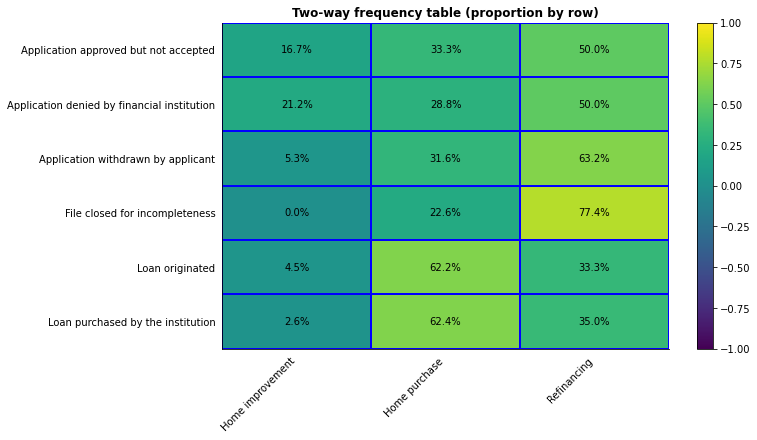

In [117]:
var1 = 'loan_purpose_name'
var2 = 'action_taken_name'
fig, table = strings_categoricals.two_way_proportions(input_data, 
                                                      x_var = var1, y_var = var2, 
                                                      normalize="row",dropna=False)

## Multi-way table and pivot

**groupby() with size() can be applied to pandas to calculate the frequency for a multi-way table**

In [118]:
threeway_table = input_data.groupby(["property_type_name", "owner_occupancy_name", "action_taken_name"], dropna=False).size().reset_index(name="Count")
threeway_table.head(10)

,property_type_name,owner_occupancy_name,action_taken_name,Count
0,Manufactured housing,Not owner-occupied as a principal dwelling,Loan originated,1
1,Manufactured housing,Owner-occupied as a principal dwelling,Application denied by financial institution,2
2,Manufactured housing,Owner-occupied as a principal dwelling,Loan originated,1
3,Multifamily dwelling,Not applicable,Loan originated,9
4,Multifamily dwelling,Not owner-occupied as a principal dwelling,Loan originated,2
5,One-to-four family dwelling (other than manufa...,Not applicable,Application approved but not accepted,1
6,One-to-four family dwelling (other than manufa...,Not applicable,Loan originated,1
7,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application approved but not accepted,2
8,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application denied by financial institution,4
9,One-to-four family dwelling (other than manufa...,Not owner-occupied as a principal dwelling,Application withdrawn by applicant,5


**Tables can be reshaped such that a variable becomes the 'column index' for a more cleaner view**

In this example keep "property_type_name", "owner_occupancy_name" as row indices, with 'action_taken_name' as the column index

In [119]:
threeway_table.pivot(index=["property_type_name", "owner_occupancy_name"], columns='action_taken_name', values="Count").fillna(0)

action_taken_name                                                                              Application approved but not accepted  \
property_type_name                                 owner_occupancy_name                                                                
Manufactured housing                               Not owner-occupied as a principal dwelling                                    0.0   
                                                   Owner-occupied as a principal dwelling                                        0.0   
Multifamily dwelling                               Not applicable                                                                0.0   
                                                   Not owner-occupied as a principal dwelling                                    0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                                1.0   
                                                   Not owner-occupied as a principal dwelling                                    2.0   
                                                   Owner-occupied as a principal dwelling                                       15.0   

action_taken_name                                                                              Application denied by financial institution  \
property_type_name                                 owner_occupancy_name                                                                      
Manufactured housing                               Not owner-occupied as a principal dwelling                                          0.0   
                                                   Owner-occupied as a principal dwelling                                              2.0   
Multifamily dwelling                               Not applicable                                                                      0.0   
                                                   Not owner-occupied as a principal dwelling                                          0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                                      0.0   
                                                   Not owner-occupied as a principal dwelling                                          4.0   
                                                   Owner-occupied as a principal dwelling                                             60.0   

action_taken_name                                                                              Application withdrawn by applicant  \
property_type_name                                 owner_occupancy_name                                                             
Manufactured housing                               Not owner-occupied as a principal dwelling                                 0.0   
                                                   Owner-occupied as a principal dwelling                                     0.0   
Multifamily dwelling                               Not applicable                                                             0.0   
                                                   Not owner-occupied as a principal dwelling                                 0.0   
One-to-four family dwelling (other than manufac... Not applicable                                                             0.0   
                                                   Not owner-occupied as a principal dwelling                                 5.0   
                                                   Owner-occupied as a principal dwelling                                    52.0   

action_taken_name                                                                              File closed for incompleteness  \
property_type_name                                 owner_occupancy_name                                                         
Manufactured housing                    